# Data Wrangling and Analyzing: WeRateDogs

<h2>Table of Contents </h2>
<ol>
    <li><a href="#wrangle">Data Wrangling</a>
        <ul>
            <li><a href="#gather">Gathering</a></li>
            <li><a href="#assess">Assessing</a></li>
            <li><a href="#clean">Cleaning</a></li>
        </ul>
    </li>
    <li><a href="#analyze">Analyzing and Visualizing Data</a>
    </li>
    

In [306]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangle'></a>
# Data Wrangling
<a id='gather'> </a>
## Gathering

In [307]:
pd.set_option('display.max_colwidth', -1)

#### First Data Frame: Twitter archive

In [308]:
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


#### Second Data Frame: Image Predictions

In [309]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### Third Data Frame: Tweets' Data 

In [310]:
# This list will be used to append tweets to it then convert it to dataframe
extra_data = []
# These are the key information we want to save
keys = ['id','retweet_count','favorite_count']

# Open the json file with the tweets' data
with open('tweet-json.txt', 'r') as file: 
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_info = dict((key, tweet[key]) for key in keys)
            extra_data.append(tweet_info)
        except:
            continue    

In [311]:
tweets_data = pd.DataFrame(data = extra_data,
                           columns=['id','retweet_count','favorite_count'])
tweets_data.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


<a id='assess'> </a>
## Assessing

### Twitter Archive:

In [312]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [313]:
twitter_data.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2089,670789397210615808,NaN,NaN,2015-11-29 02:20:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two obedient dogs here. Left one has extra leg sticking out of its back. They each get 9/10. Would pet both at once https://t.co/RGcNPsmAfY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670789397210615808/photo/1,9,10,None,None,None,None,None


In the sample we notice that the name column is inaccurate because it extracted the article "a" as the name. Lets find out more about this.

In [314]:
twitter_data['name'].value_counts()

None            745
a               55 
Charlie         12 
Lucy            11 
Cooper          11 
Oliver          11 
Tucker          10 
Lola            10 
Penny           10 
Winston         9  
Bo              9  
the             8  
Sadie           8  
Toby            7  
Bailey          7  
Buddy           7  
Daisy           7  
an              7  
Koda            6  
Scout           6  
Milo            6  
Stanley         6  
Jax             6  
Leo             6  
Rusty           6  
Dave            6  
Oscar           6  
Jack            6  
Bella           6  
Louis           5  
               ..  
Claude          1  
Harry           1  
Cal             1  
Patch           1  
Milky           1  
Brutus          1  
Dylan           1  
Brian           1  
Bertson         1  
Apollo          1  
Tino            1  
Tonks           1  
Hamrick         1  
Jimbo           1  
Harlso          1  
Dutch           1  
Covach          1  
Walker          1  
Sprout          1  


So there are more articles; "the" and "an". But that's not all the inaccuracy in this column. Near the end we notice the word "unacceptable", which probably is not a dog name.

In [315]:
twitter_data.query('name == "unacceptable"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1121,730924654643314689,NaN,NaN,2016-05-13 00:56:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654643314689/photo/1,9,10,unacceptable,None,None,None,None


In [316]:
twitter_data.text[1121]

'We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z'

Yup. "unacceptable" is not the dog's name. It looks like all words in the name column starting with a lowercase letter are not dogs' names.

In [317]:
twitter_data['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [318]:
twitter_data.query('rating_numerator < 10').loc[:987].text

45     This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                          
229    This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
315    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                                                 
387    I was going to do 007/10, but the joke wasn't worth the &lt;10 rating                                                                                             
462    RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…                      
485    RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/

In [319]:
twitter_data.query('rating_numerator < 10').loc[987:].text

987     This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC       
993     This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd    
998     This sherk must've leapt out of the water and into the canoe, trapping the human. Won't even help paddle smh. 7/10 https://t.co/KubWEqOIgO      
1002    This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW    
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R      
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX                         
1025    This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs

In [320]:
twitter_data.rating_numerator.sort_values(ascending=False)

979     1776
313     960 
189     666 
188     420 
2074    420 
1120    204 
290     182 
902     165 
1779    144 
1634    143 
1635    121 
1228    99  
1843    88  
433     84  
1254    80  
695     75  
340     75  
1351    60  
1202    50  
1274    45  
1433    44  
763     27  
1712    26  
516     24  
1663    20  
55      17  
285     15  
291     15  
83      14  
866     14  
        ..  
2183    3   
1314    3   
1928    3   
765     3   
2202    3   
1692    3   
1478    3   
1898    3   
1249    3   
2305    3   
2079    2   
2326    2   
2349    2   
2237    2   
2246    2   
1920    2   
1761    2   
2310    2   
1764    2   
1940    1   
2038    1   
2091    1   
1869    1   
1446    1   
605     1   
2338    1   
2261    1   
2335    1   
1016    0   
315     0   
Name: rating_numerator, Length: 2356, dtype: int64

We will check the observations with the highest values to check for outliers.

In [321]:
twitter_data.query('rating_numerator > 27').text

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                            
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10             
290     @markhoppus 182/10                                                                                                                                
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…      
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
695     This is Logan, the Chow who lived. He solemnly swears he's up 

Ignoring retweets and replies, there are some other issues we need to assess. 
- For observations rating multiple dogs of the same breed and size, we can see that the rating denominator is just a multiple of 10, whereas the numerator divided by 10 is the rating for each dog. So, we'll have to clean those numbers. The same goes for those rating multiple dogs of different sizes and/or breed, but we'll remove those instead of cleaning them because they will make our analysis inaccurate.

- It seems that if the numerator is a decimal the dot gets ignored and the decimal gets extracted as the numerator. That will need to be cleaned. 

- There are tweets containing numbers like 24/7 or 50/50 that are not related to the ratings but got wrongfully extracted as the rating numerators and denominators. These need to be cleaned

- The observation with the 1776 numerator is for the year America became independent. The tweet seems like a celebratory tweet more than a rating making it an outlier, so it will be removed.

- The observation with the 420 numerator is not a dog, so it will be removed.

#### Quality issues:

1. All id columns should be either string or int, preferably string
2. Timestamp datatype should be datetime
3. Source link should be without the html tags
4. The name column is not accurate. All names starting with a lowercase letter will be removed.
5. We notice that there are 78 replies and 181 retweets which will be removed.
6. Rating denominator column should all be 10. We notice that there are other values in that column for tweets rating multiple dogs. Those will be cleaned and/or removed. 
7. Observations at these indexes are not dogs: 229, 765, 835, 883, 964, 987, 1016, 1045, 1057, 1125, 2074, 2316, 2322,2326, 2330, 2334, 2338, 2349.
9. Fix wrongfully extracted numerators/denominators.
10. Remove outliers.

#### Tidiness issues:

1. Doggo, floofer, pupper, and puppo columns are all one variable which is the phase or stage. Therefore, they belong in one column.

### Image Predictions:

In [322]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [323]:
image_predictions.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True


In [324]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [325]:
image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False').shape[0]

324

#### Quality issues:

1. Id column should be string.
2. There are 324 rows with all 3 predictions pointing to False. These will be removed.

#### Tidiness issues:

1. The jpg_url column represents a variable that is already included in the twitter_data dataset in the tweet's url. It will be removed to avoid redundancy.
2. We don't need 3 predictions of the dog's breed. We'll keep the first True one and remove the rest.

### Tweets' Data:

In [326]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [327]:
tweets_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [328]:
tweets_data.sample()

,id,retweet_count,favorite_count
1478,693486665285931008,698,1941


#### Quality issues:

1. The id column should be string

<a id='clean'> </a>
## Cleaning

### Twitter Archive

In [329]:
clean_twitter_data = twitter_data.copy()

#### Quality

#### Define
1. Remove retweets and replies

#### Code

In [330]:
indx = clean_twitter_data[clean_twitter_data.retweeted_status_id.notnull()].index
clean_twitter_data.drop(indx, inplace = True)

indx = clean_twitter_data[clean_twitter_data.in_reply_to_status_id.notnull()].index
clean_twitter_data.drop(indx, inplace = True)

Since we got rid of retweets and replies we don't need the columns related to them. So we will remove those columns.

In [331]:
clean_twitter_data.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)
clean_twitter_data.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


#### Test

In [332]:
clean_twitter_data.text.str.contains('RT @dog_rates').sum()

0

In [333]:
clean_twitter_data.text.str.startswith('@').sum()

0

#### Define
2. The denominator must be 10. So we will go over the odd values to check for their genuinity. 

#### Code

In [334]:
clean_twitter_data.query('rating_denominator != 10').text

433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

Fixing tweets rating multiple dogs:

In [335]:
clean_twitter_data.loc[[433],['rating_numerator','rating_denominator']] = 12,10 
clean_twitter_data.loc[[1068],['rating_numerator','rating_denominator']] = 14,10 
clean_twitter_data.loc[[1165],['rating_numerator','rating_denominator']] = 13,10 
clean_twitter_data.loc[[1202],['rating_numerator','rating_denominator']] = 11,10 
clean_twitter_data.loc[[1228],['rating_numerator','rating_denominator']] = 11,10 
clean_twitter_data.loc[[1254],['rating_numerator','rating_denominator']] = 10,10 
clean_twitter_data.loc[[1351],['rating_numerator','rating_denominator']] = 12,10 
clean_twitter_data.loc[[1433],['rating_numerator','rating_denominator']] = 11,10 
clean_twitter_data.loc[[1635],['rating_numerator','rating_denominator']] = 11,10 
clean_twitter_data.loc[[1622],['rating_numerator','rating_denominator']] = 10,10 
clean_twitter_data.loc[[1779],['rating_numerator','rating_denominator']] = 12,10 
clean_twitter_data.loc[[1843],['rating_numerator','rating_denominator']] = 11,10 
clean_twitter_data.loc[[2335],['rating_numerator','rating_denominator']] = 9,10 

Removing the rest:

In [336]:
# clean_twitter_data.query('rating_denominator != 10').index
indx = clean_twitter_data[clean_twitter_data['rating_denominator'] != 10].index
clean_twitter_data.drop(indx, inplace = True)

#### Test

In [337]:
clean_twitter_data.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Since all denominators are 10 we can get rid of the denominator column.

In [338]:
clean_twitter_data.drop(columns = 'rating_denominator', inplace=True)

#### Define
3. Now, we will remove inaccurate names.

#### Code

In [339]:
mask = clean_twitter_data.name.str.contains('^[a-z]', regex = True)
clean_twitter_data.loc[mask, 'name'] = None

#### Test

In [340]:
clean_twitter_data.name.str.contains('^[a-z]').sum()

0

#### Define
4. The id column should preferably be string
5. Timestamp datatype should be datetime

#### Code

In [341]:
clean_twitter_data.tweet_id = clean_twitter_data.tweet_id.astype(str)

In [342]:
clean_twitter_data['timestamp'] = pd.to_datetime(clean_twitter_data.timestamp)

#### Test

In [343]:
clean_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id            2092 non-null object
timestamp           2092 non-null datetime64[ns]
source              2092 non-null object
text                2092 non-null object
expanded_urls       2089 non-null object
rating_numerator    2092 non-null int64
name                1989 non-null object
doggo               2092 non-null object
floofer             2092 non-null object
pupper              2092 non-null object
puppo               2092 non-null object
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 196.1+ KB


#### Define
6. Source column values should be without the html tags

#### Code

In [344]:
clean_twitter_data['source'] = clean_twitter_data['source'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

#### Test

In [345]:
clean_twitter_data.source.str.contains('<a href=').sum()

0

#### Define
7. Observations at these indexes are not dogs: 229, 765, 835, 883, 964, 987, 1016, 1045, 1057, 1125, 2074, 2316, 2322,2326, 2330, 2334, 2338, 2349.


#### Code

In [346]:
# 835  883  964 1016 1045 1125 2326 2330 2334 2338 2349 have already been removed
indexes = [229, 765, 987, 1057, 2074, 2316, 2322]
clean_twitter_data.drop(indexes, axis=0, inplace=True)

#### Test

In [347]:
clean_twitter_data.text.loc[225:230]

225    This is Kevin. Kevin doesn't give a single h*ck. Will sit in the fountain if he wants to. 13/10 churlish af https://t.co/r6GjO6MbZz                                
226    Please stop sending in animals other than dogs. We only rate dogs. Not Furry Ecuadorian Sea Turtles. Thank you... 12/10 https://t.co/UOE79zb6VU                    
227    Meet Odin. He's supposed to be giving directions but he'd rather look at u like that. Should probably buckle pup. 12/10 distracting as h*ck https://t.co/1pSqUbLQ5Z
Name: text, dtype: object

#### Define
8. Fix wrongly extracted numerators/denominators.

#### Code

In [348]:
clean_twitter_data['text'].str.extract('(\d*\.*\d+)')[0].value_counts()

12       474
10       415
11       392
13       281
9        141
8        95 
7        47 
14       35 
6        32 
5        32 
3        25 
4        22 
2        22 
1        10 
...10    8  
0        5  
...11    4  
...9     3  
50       2  
2015     2  
31       2  
100      2  
80       2  
1949     1  
.3       1  
2016     1  
44       1  
8.98     1  
...12    1  
1776     1  
33       1  
98       1  
46       1  
15       1  
11.27    1  
97       1  
9.75     1  
2002     1  
47       1  
11.26    1  
.13      1  
...8     1  
144      1  
2003     1  
88       1  
150      1  
17       1  
.10      1  
121      1  
92.49    1  
84       1  
400      1  
61       1  
60       1  
13.5     1  
Name: 0, dtype: int64

We'll check the decimals we found to see if there were any numerators wrongly extracted, and then clean them. <br>
decimals: 92.49, 11.26, 13.5, 9.75, 11.27, 8.98.

In [349]:
clean_twitter_data[clean_twitter_data['text'].str.contains('11.26')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,None,None,None,None,None


In [350]:
clean_twitter_data[clean_twitter_data['text'].str.contains('13.5')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,Bella,None,None,None,None


In [351]:
clean_twitter_data[clean_twitter_data['text'].str.contains('9.75')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,Logan,None,None,None,None


In [352]:
clean_twitter_data[clean_twitter_data['text'].str.contains('11.27')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,Sophie,None,None,pupper,None


In [353]:
# Rounding the decimals: 

clean_twitter_data.loc[1712, 'rating_numerator'] = 11
clean_twitter_data.loc[45, 'rating_numerator'] = 14
clean_twitter_data.loc[695, 'rating_numerator'] = 10
clean_twitter_data.loc[763, 'rating_numerator'] = 11


In [354]:
clean_twitter_data.rating_numerator[1712]

11

#### Define
9. Remove outliers.

#### Code

In [355]:
clean_twitter_data.rating_numerator.sort_values(ascending=False)

979     1776
339     14  
83      14  
123     14  
117     14  
110     14  
1068    14  
533     14  
1053    14  
76      14  
41      14  
631     14  
56      14  
657     14  
924     14  
45      14  
490     14  
141     14  
449     14  
448     14  
436     14  
426     14  
164     14  
418     14  
404     14  
395     14  
187     14  
372     14  
369     14  
199     14  
        ..  
1478    3   
1314    3   
1947    3   
1406    3   
2136    3   
2239    3   
1189    3   
2334    3   
1898    3   
1938    3   
1601    3   
2305    3   
2202    3   
1692    3   
1928    3   
1249    3   
1920    2   
2326    2   
2310    2   
2079    2   
1761    2   
2246    2   
2349    2   
1764    2   
2237    2   
2338    1   
2261    1   
2091    1   
1869    1   
315     0   
Name: rating_numerator, Length: 2085, dtype: int64

In [356]:
clean_twitter_data.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,Atticus,None,None,None,None


1776 is the year America became independent. Seeing as this tweets seems more a celebratory than a rating, it will be removed.

In [357]:
index = clean_twitter_data.query('rating_numerator == 1776').index
clean_twitter_data.drop(index, axis=0, inplace=True)

#### Test

In [358]:
clean_twitter_data.rating_numerator.sort_values(ascending=False).head(10)

339     14
924     14
533     14
76      14
347     14
418     14
164     14
41      14
214     14
1609    14
Name: rating_numerator, dtype: int64

#### Tidiness 

#### Define
1. We will merge the doggo, floofler, pupper, and puppo columns in one column.

#### Code

In [359]:
clean_twitter_data['stage'] = clean_twitter_data[['doggo','floofer','pupper','puppo']].replace('None','').sum(axis=1)

In [360]:
clean_twitter_data.drop(columns = ['doggo','floofer','pupper','puppo'], inplace=True)
clean_twitter_data['stage'].value_counts()

                1749
pupper          220 
doggo           72  
puppo           23  
floofer         9   
doggopupper     9   
doggofloofer    1   
doggopuppo      1   
Name: stage, dtype: int64

We'll check the text of the concatanated multiple values and correct any inaccuracy.

In [361]:
clean_twitter_data.query('stage == "doggopupper"').text

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
575     This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj                    
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733     Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u                                                                                                          
889     Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https:

In [362]:
clean_twitter_data.loc[[460],'stage'] = 'pupper'
clean_twitter_data.loc[[575],'stage'] = 'pupper'
clean_twitter_data.loc[[956],'stage'] = 'doggo'

Tweets that werent corrected will be removed. That is because they either included multiple dogs or the animal rated was not a dog, which would make our analysis inaccurate.

In [363]:
clean_twitter_data.drop(labels=[531,705,733,889,1063,1113], inplace=True)

In [364]:
clean_twitter_data.query('stage == "doggopuppo"').text

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

In [365]:
clean_twitter_data.query('stage == "doggofloofer"').text

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object

In [366]:
clean_twitter_data.loc[[191],'stage'] = 'puppo'
clean_twitter_data.loc[[200],'stage'] = 'floofer'

In [367]:
for x in clean_twitter_data.index:
    if clean_twitter_data.stage[x] != "pupper" and clean_twitter_data.stage[x] != "doggo" and clean_twitter_data.stage[x] != "puppo" and clean_twitter_data.stage[x] != "floofer":
        clean_twitter_data.loc[x, 'stage'] = None    

#### Test

In [368]:
clean_twitter_data['stage'].value_counts()

pupper     222
doggo      73 
puppo      24 
floofer    10 
Name: stage, dtype: int64

### Image Predictions

In [369]:
clean_image_predictions = image_predictions.copy()

#### Quality

#### Define
1. Id column should preferable be string.

#### Code

In [370]:
clean_image_predictions.tweet_id = clean_image_predictions.tweet_id.astype(str)

#### Test

In [371]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
2. There are 324 rows with all 3 predictions pointing to False. These will be removed.

#### Code

In [372]:
ids = clean_image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False').tweet_id
index = clean_image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False').index

In [373]:
clean_image_predictions.drop(index, inplace = True)

In [374]:
for x in ids:
    indx = clean_twitter_data[clean_twitter_data['tweet_id'] == x].index
    clean_twitter_data.drop(indx, inplace = True)

#### Test

In [375]:
clean_image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False').shape[0]

0

#### Tidiness

#### Define
1. The jpg_url column represents a variable that is already included in the twitter_data dataset in the tweet's url. It will be removed to avoid redundancy.

#### Code

In [376]:
clean_image_predictions.drop(columns='jpg_url',inplace=True)

#### Test

In [377]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 128.2+ KB


#### Define
2. We don't need 3 predictions of the dog's breed. We'll keep the first True one and remove the rest.

#### Code

In [378]:
# Source:    https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb

clean_image_predictions['breed'] = np.select([(clean_image_predictions['p1_dog'] == True), (clean_image_predictions['p2_dog'] == True),(clean_image_predictions['p3_dog'] == True)], 
                                             [clean_image_predictions['p1'], clean_image_predictions['p2'],clean_image_predictions['p3']], 
                                               default = None)

In [379]:
clean_image_predictions.drop(columns=['img_num','p1','p1_conf','p1_conf','p2','p2_conf','p3','p3_conf'], inplace=True)

We dont need the p1_dog, p2_dog, nor p3_dog columns anymore.

In [380]:
clean_image_predictions.drop(columns=['p1_dog','p2_dog','p3_dog'], inplace=True)

#### Test

In [381]:
clean_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id    1751 non-null object
breed       1751 non-null object
dtypes: object(2)
memory usage: 41.0+ KB


### Tweets' Data

In [382]:
clean_tweets_data = tweets_data.copy()

#### Quality

#### Define
1. The id column should be String

#### Code

In [383]:
clean_tweets_data.id = clean_tweets_data.id.astype(str)

#### Test

In [384]:
clean_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


we need to have the id column renamed like the one in the twitter dataframe so that we can join the dataframes later

In [385]:
clean_tweets_data.rename(columns={'id':'tweet_id'}, inplace=True)

### Store data

Before we store our data we'll join the 3 tables together to form 1 coherent table, then delete all the columns we won't need in our analysis. 

In [386]:
twitter_archive = pd.merge(clean_twitter_data, clean_image_predictions, on='tweet_id', how='left')
twitter_archive = pd.merge(twitter_archive, clean_tweets_data, on = 'tweet_id', how='left')

In [387]:
twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,None,Chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,None,Chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,None,Labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,None,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,None,None,Chesapeake_Bay_retriever,3261,20562


In [388]:
twitter_archive.drop(columns=['timestamp','source','text','expanded_urls','name'], inplace=True)

In [389]:
twitter_archive.to_csv('twitter_archive_master.csv', index=False)

<a id='analyze'> </a>
# Analyzing and Visualizing Data

In [390]:
twitter_df = pd.read_csv('twitter_archive_master.csv')

In [391]:
twitter_df.stage.value_counts()

pupper     187
doggo      64 
puppo      23 
floofer    10 
Name: stage, dtype: int64

In [392]:
twitter_df.breed.value_counts().head(5)

golden_retriever      151
Labrador_retriever    105
Pembroke              94 
Chihuahua             89 
pug                   62 
Name: breed, dtype: int64

In [393]:
twitter_df.groupby('stage')['favorite_count'].mean().sort_values(ascending=False)

stage
puppo      22650.913043
doggo      17711.875000
floofer    11674.900000
pupper     7588.748663 
Name: favorite_count, dtype: float64

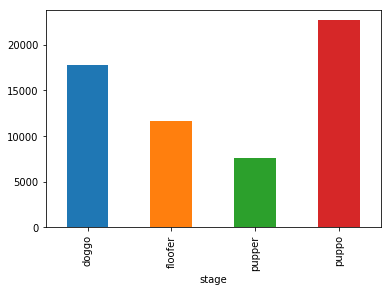

In [394]:
twitter_df.groupby('stage')['favorite_count'].mean().plot(kind='bar');

In [395]:
twitter_df.groupby('stage')['retweet_count'].mean().sort_values(ascending=False)

stage
puppo      7063.521739
doggo      6398.828125
floofer    4083.600000
pupper     2563.593583
Name: retweet_count, dtype: float64

In [396]:
twitter_df.groupby('stage')['rating_numerator'].mean().sort_values(ascending=False)

stage
puppo      12.000000
floofer    11.800000
doggo      11.765625
pupper     10.989305
Name: rating_numerator, dtype: float64

In [397]:
twitter_df.groupby('breed')['favorite_count'].mean().sort_values(ascending=False).head(5)

breed
Saluki                  24060.0
Afghan_hound            22451.0
Bedlington_terrier      21860.2
French_bulldog          18842.0
Bouvier_des_Flandres    18032.0
Name: favorite_count, dtype: float64

In [398]:
twitter_df.groupby('breed')['retweet_count'].mean().sort_values(ascending=False).head(5)

breed
Bedlington_terrier    8323.400000
Afghan_hound          8017.500000
standard_poodle       5508.909091
English_springer      5401.600000
French_bulldog        5148.233333
Name: retweet_count, dtype: float64

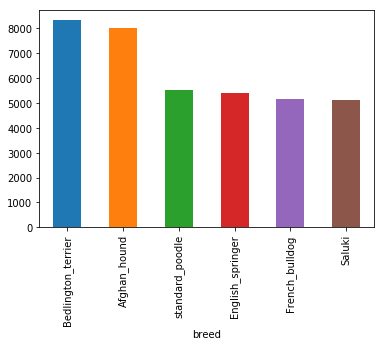

In [399]:
twitter_df.groupby('breed')['retweet_count'].mean().sort_values(ascending=False).head(6).plot(kind='bar');

In [400]:
twitter_df.groupby('breed')['rating_numerator'].mean().sort_values(ascending=False).head(5)

breed
Afghan_hound            13.000000
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Name: rating_numerator, dtype: float64

1. Most common stage of dogs rated is the pupper stage.
2. Most common breed of dogs rated is the Golden Retriever.
3. Even though puppers are the most common dogs rated, they have the least ratings, favorites, and retweets.
4. The puppos have higher ratings, favorites, and retweets.
5. Most commonly rated dog breeds are the Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, and pug. However, none of them are one of the most highly rated, favorited, nor retweeted breeds.